In [214]:
#Dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style
style.available
style.use('fivethirtyeight')

In [215]:
data_lax=pd.read_csv('airline_details_LAX.csv')
data_lax = data_lax.dropna(how='any')

In [216]:
data_lax.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,...,2.83,125.88,49,7,25079,9537,1082,5213,391,8856
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,...,0.00,3.13,0,0,1485,758,73,434,0,220
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,...,0.00,7.32,0,0,632,71,16,143,0,402
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,...,9.38,19.83,1,0,6021,2496,418,1255,621,1231
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,...,0.00,39.48,4,4,10147,4911,516,2168,0,2552


In [52]:
data_lax.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,2013.815441,6.401471,1440.832353,289.808824,74.568250,7.809522,106.220897,0.649228,100.560801,15.888971,1.970588,15571.562500,4649.906618,578.834559,3932.652941,28.969118,6381.199265
std,2.608453,3.475002,1333.226070,306.933599,75.882867,11.090987,121.960207,1.223894,135.237403,24.165212,2.919678,16887.705822,4844.115650,891.161542,4920.649941,77.750127,8093.567157
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,220.500000,49.000000,16.822500,0.247500,18.722500,0.000000,9.440000,0.000000,0.000000,2262.250000,848.000000,12.750000,655.750000,0.000000,562.500000
50%,2014.000000,6.000000,806.000000,166.500000,42.165000,3.310000,63.755000,0.000000,37.985000,3.000000,1.000000,8571.500000,2527.000000,233.500000,2216.000000,0.000000,2535.000000
75%,2016.000000,9.000000,2544.000000,461.500000,116.765000,10.905000,158.760000,1.000000,139.150000,23.000000,3.000000,25360.250000,7568.000000,767.250000,5600.250000,29.000000,10136.500000
max,2019.000000,12.000000,5571.000000,1711.000000,385.210000,85.520000,1030.820000,11.560000,744.420000,138.000000,27.000000,90566.000000,32362.000000,8552.000000,43464.000000,1482.000000,43567.000000


In [53]:
data_lax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1359
Data columns (total 21 columns):
year                   1360 non-null int64
 month                 1360 non-null int64
carrier                1360 non-null object
carrier_name           1360 non-null object
airport                1360 non-null object
airport_name           1360 non-null object
arr_flights            1360 non-null int64
arr_del15              1360 non-null int64
carrier_ct             1360 non-null float64
 weather_ct            1360 non-null float64
nas_ct                 1360 non-null float64
security_ct            1360 non-null float64
late_aircraft_ct       1360 non-null float64
arr_cancelled          1360 non-null int64
arr_diverted           1360 non-null int64
 arr_delay             1360 non-null int64
 carrier_delay         1360 non-null int64
weather_delay          1360 non-null int64
nas_delay              1360 non-null int64
security_delay         1360 non-null int64
late_aircraft_delay

In [235]:
data_lax.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [236]:
data_lax = data_lax.rename(columns={' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay', ' carrier_delay':'carrier_delay'})

In [263]:
import calendar

def to_month_name (month_idx):
    month = calendar.month_abbr[month_idx]
    return month
        
data_lax['month_name'] = data_lax['month'].apply(to_month_name)
data_lax

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month_name
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,...,125.88,49,7,25079,9537,1082,5213,391,8856,Jan
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,...,3.13,0,0,1485,758,73,434,0,220,Jan
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,...,7.32,0,0,632,71,16,143,0,402,Jan
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,...,19.83,1,0,6021,2496,418,1255,621,1231,Jan
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,...,39.48,4,4,10147,4911,516,2168,0,2552,Jan
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,...,7.52,0,0,1204,351,48,440,0,365,Jan
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,...,17.30,0,0,2173,641,104,507,0,921,Jan
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,...,6.05,0,0,1174,963,0,21,0,190,Jan
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,...,107.48,35,3,9076,1107,203,1899,55,5812,Jan
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,...,347.08,79,2,32850,6017,808,6506,71,19448,Jan


In [264]:
import calendar

def to_month_name (month_idx):
    month_name = calendar.month_abbr[month_idx]
    return month_name
        
data_lax['month_name'] = data_lax['month'].apply(to_month_name)
data_lax


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month_name
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,...,125.88,49,7,25079,9537,1082,5213,391,8856,Jan
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,...,3.13,0,0,1485,758,73,434,0,220,Jan
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,...,7.32,0,0,632,71,16,143,0,402,Jan
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,...,19.83,1,0,6021,2496,418,1255,621,1231,Jan
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,...,39.48,4,4,10147,4911,516,2168,0,2552,Jan
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,...,7.52,0,0,1204,351,48,440,0,365,Jan
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,...,17.30,0,0,2173,641,104,507,0,921,Jan
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,...,6.05,0,0,1174,963,0,21,0,190,Jan
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,...,107.48,35,3,9076,1107,203,1899,55,5812,Jan
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,...,347.08,79,2,32850,6017,808,6506,71,19448,Jan


In [239]:
data_lax = data_lax[data_lax['year'] != 2019]

In [240]:
def aggr_group_df(df, group, aggr_field, fields):
    new_df = pd.DataFrame(df.groupby(by=group)[fields].sum())
    new_df[aggr_field] = new_df.apply(lambda row: sum(row[fields]), axis = 1)
    return new_df

In [241]:
FLIGHTS_AGGR_FIELDS = ['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']
TOTAL_FLIGHTS_FIELD = 'total_flights'

data_grouped_yr = aggr_group_df(data_lax, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
data_grouped_yr

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,199685,34067,2292,240,236284
2011,210952,39972,2764,341,254029
2012,222921,39347,2493,241,265002
2013,224821,42920,2541,332,270614
2014,221941,47721,2726,298,272686
2015,212435,45714,2337,315,260801
2016,212972,49065,1945,321,264303
2017,214312,52056,2218,308,268894
2018,221516,40015,2002,253,263786


In [242]:
data_grouped_yr = data_lax.groupby(by='year')
data_grouped_yr = pd.DataFrame(data_grouped_yr[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum())

data_grouped_yr['total_flights'] = data_grouped_yr['arr_flights']+ data_grouped_yr['arr_del15']+ data_grouped_yr['arr_cancelled']+ data_grouped_yr['arr_diverted']

data_grouped_yr


,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,199685,34067,2292,240,236284
2011,210952,39972,2764,341,254029
2012,222921,39347,2493,241,265002
2013,224821,42920,2541,332,270614
2014,221941,47721,2726,298,272686
2015,212435,45714,2337,315,260801
2016,212972,49065,1945,321,264303
2017,214312,52056,2218,308,268894
2018,221516,40015,2002,253,263786


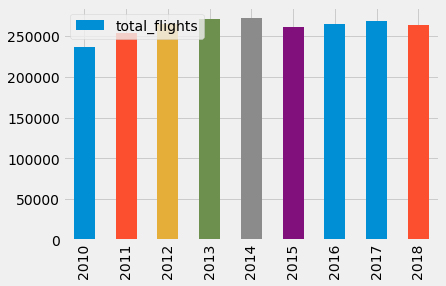

In [243]:
x_axis = data_grouped_yr.index.values
#data_grouped_yr.sort_values('total_flights',inplace=True)
data_grouped_yr.plot.bar(x_axis, 'total_flights')

In [244]:
data_grouped_mnth = aggr_group_df(data_lax, [ 'month'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
data_grouped_mnth

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
month,,,,,
1,155164,29301,2571,217,187253
2,142086,28724,2365,296,173471
3,162707,34579,1951,217,199454
4,158910,31733,1454,194,192291
5,165137,34213,1435,168,200953
6,169900,38993,1801,163,210857
7,177278,38486,2036,189,217989
8,175388,36616,1855,175,214034
9,158043,24474,1271,139,183927


In [272]:
data_grouped_mnth_test = aggr_group_df(data_lax, [ 'month_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
data_grouped_mnth_test.index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_grouped_mnth_test

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
Jan,158910,31733,1454,194,192291
Feb,175388,36616,1855,175,214034
Mar,160288,39223,1965,397,201873
Apr,142086,28724,2365,296,173471
May,155164,29301,2571,217,187253
Jun,177278,38486,2036,189,217989
Jul,169900,38993,1801,163,210857
Aug,162707,34579,1951,217,199454
Sep,165137,34213,1435,168,200953
Oct,153551,25399,1249,313,180512


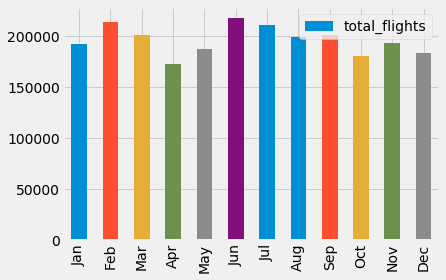

In [275]:
x_axis = data_grouped_mnth_test.index.values
data_grouped_mnth_test.plot.bar(x_axis, 'total_flights')

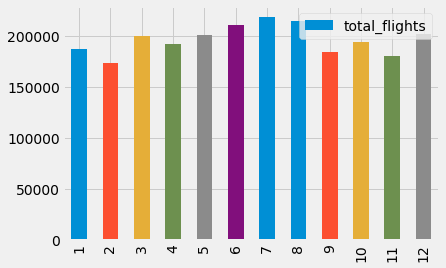

In [267]:
# data_grouped_mnth.sort_values('total_flights',inplace=True)
x_axis = data_grouped_mnth.index.values
data_grouped_mnth.plot.bar(x_axis, 'total_flights')

In [64]:
data_grouped_mnth.index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [65]:
data_lax.head(14)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,...,2.83,125.88,49,7,25079,9537,1082,5213,391,8856
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,...,0.00,3.13,0,0,1485,758,73,434,0,220
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,...,0.00,7.32,0,0,632,71,16,143,0,402
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,...,9.38,19.83,1,0,6021,2496,418,1255,621,1231
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,...,0.00,39.48,4,4,10147,4911,516,2168,0,2552
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,...,0.00,7.52,0,0,1204,351,48,440,0,365
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,...,0.00,17.30,0,0,2173,641,104,507,0,921
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,...,0.00,6.05,0,0,1174,963,0,21,0,190
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,...,0.81,107.48,35,3,9076,1107,203,1899,55,5812
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,...,2.53,347.08,79,2,32850,6017,808,6506,71,19448


In [76]:
carrier_over_years = aggr_group_df(data_lax, [ 'year', 'carrier_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
carrier_over_years

arr_flights  arr_del15  arr_cancelled  \
year carrier_name                                                          
2010 AirTran Airways Corporation          2347        568              4   
     Alaska Airlines Inc.                 5866        497             11   
     American Airlines Inc.              28067       5324            346   
     American Eagle Airlines Inc.        14495       1584            124   
     Continental Air Lines Inc.           7778       1816             33   
     Delta Air Lines Inc.                19552       4339            141   
     Frontier Airlines Inc.               2336        512              9   
     Hawaiian Airlines Inc.                803        172              0   
     JetBlue Airways                      1668        399             27   
     Mesa Airlines Inc.                   1530        221             15   
     SkyWest Airlines Inc.               44739       6772            583   
     Southwest Airlines Co.              39135       7904            664   
     US Airways Inc.                      5797       1051             36   
     United Air Lines Inc.               25572       2908            299   
2011 AirTran Airways Corporation          2427        533             10   
     Alaska Airlines Inc.                 6154        583              7   
     American Airlines Inc.              28781       6146            492   
     American Eagle Airlines Inc.        19910       2218            293   
     Continental Air Lines Inc.           8322       2196             59   
     Delta Air Lines Inc.                19674       3895            109   
     Frontier Airlines Inc.               2205        570             11   
     Hawaiian Airlines Inc.                812        158              0   
     JetBlue Airways                      2368        680             24   
     Mesa Airlines Inc.                    482         49             17   
     SkyWest Airlines Inc.               50081       8762            734   
     Southwest Airlines Co.              38887       8207            658   
     US Airways Inc.                      6875       1765             28   
     United Air Lines Inc.               23974       4210            322   
2012 AirTran Airways Corporation          1712        263              1   
     Alaska Airlines Inc.                 6007        744             18   
...                                        ...        ...            ...   
2016 Hawaiian Airlines Inc.               1770        292              1   
     JetBlue Airways                      5139       1151             17   
     SkyWest Airlines Inc.               24991       5405            209   
     Southwest Airlines Co.              42117      12121            774   
     Spirit Air Lines                     8838       2306            127   
     United Air Lines Inc.               28516       6677            228   
     Virgin America                      14092       3084            134   
2017 Alaska Airlines Inc.                 8708       1938             67   
     American Airlines Inc.              38499       7933            271   
     Delta Air Lines Inc.                32135       6903            103   
     Frontier Airlines Inc.               1934        577              9   
     Hawaiian Airlines Inc.               1751        410              6   
     JetBlue Airways                      5916       1718             53   
     SkyWest Airlines Inc.               31807       7794            328   
     Southwest Airlines Co.              42457      13054            815   
     Spirit Air Lines                     9296       2282            219   
     United Air Lines Inc.               27206       5384            157   
     Virgin America                      14603       4063            190   
2018 Alaska Airlines Inc.                18410       3316            241   
     Allegiant Air                        1576        383             12   
     Am

In [78]:
# airlines performance over the years:

airlines_df = carrier_over_years.pivot_table(index='carrier_name', columns='year')['total_flights']
airlines_df = airlines_df.dropna(how='any')
airlines_df

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,6377.0,6749.0,6772.0,7226.0,7839.0,10298.0,10137.0,10715.0,21975.0
American Airlines Inc.,33796.0,35488.0,36546.0,37042.0,39273.0,43450.0,51223.0,46783.0,47698.0
Delta Air Lines Inc.,24071.0,23719.0,22347.0,24723.0,25716.0,32739.0,42549.0,39182.0,40547.0
Frontier Airlines Inc.,2859.0,2792.0,2234.0,1961.0,1704.0,1965.0,2210.0,2524.0,1491.0
Hawaiian Airlines Inc.,981.0,972.0,1303.0,1404.0,1714.0,1861.0,2067.0,2176.0,2780.0
JetBlue Airways,2109.0,3095.0,3508.0,4400.0,4322.0,5458.0,6323.0,7697.0,7738.0
SkyWest Airlines Inc.,52117.0,59623.0,62244.0,73867.0,70634.0,48632.0,30634.0,39964.0,38483.0
Southwest Airlines Co.,47734.0,47801.0,44885.0,47061.0,50958.0,52009.0,55057.0,56368.0,53285.0
United Air Lines Inc.,28804.0,28538.0,39657.0,39435.0,40740.0,37503.0,35479.0,32780.0,33725.0


In [79]:
len(airlines_df.index)

9

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


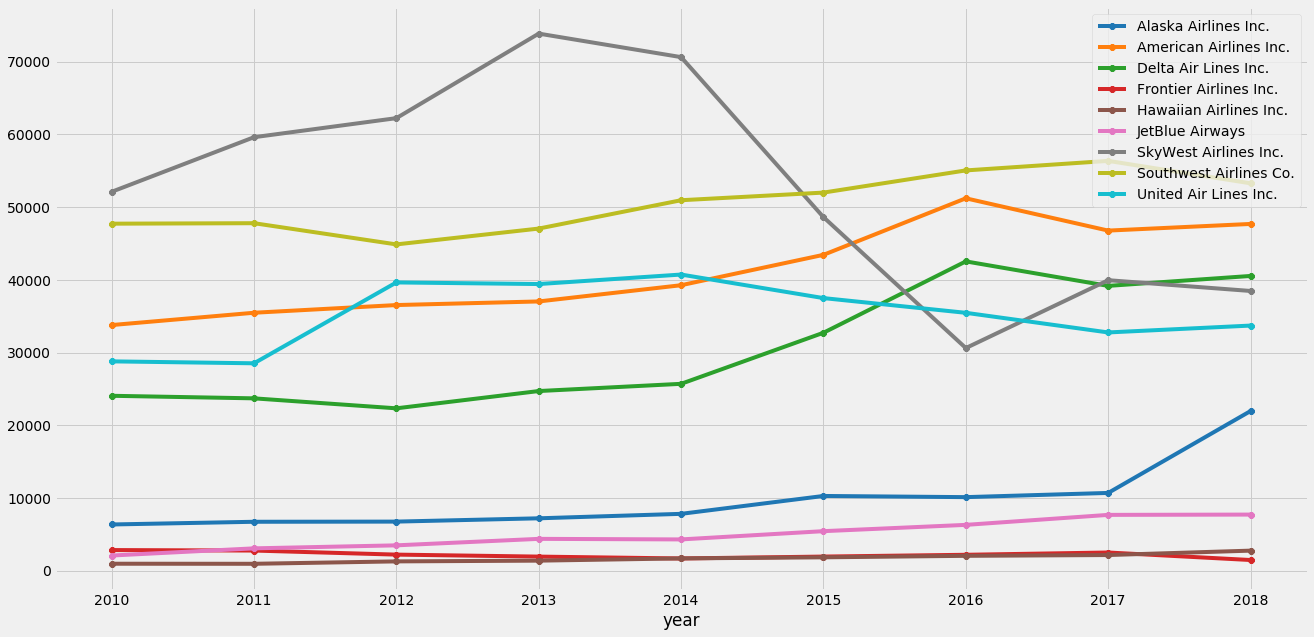

In [219]:
import numpy as np 

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in airlines_df]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for index in airlines_df.index.values:
    airlines_df.loc[index,:].plot(kind='line', marker="8", linestyle='-')
    
plt.legend(loc='best')


In [105]:
# airlines  - perecentage of flights on times 

ontime_arr_pct = (carrier_over_years['arr_flights'] / carrier_over_years['total_flights']) * 100
ontime_arr_pct = pd.DataFrame(ontime_arr_pct)

ontime_arr_pct = ontime_arr_pct.pivot_table(index='carrier_name', columns='year')

ontime_arr_pct = ontime_arr_pct.dropna(how='any')[0]
ontime_arr_pct

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,91.986828,91.183879,88.703485,88.956546,88.327593,87.279083,86.712045,81.269249,83.777019
American Airlines Inc.,83.048290,81.100654,81.631369,82.922088,81.941792,82.939010,80.684458,82.292713,85.160803
Delta Air Lines Inc.,81.226372,82.946161,86.727525,87.125349,86.051485,84.972052,83.806905,82.014701,86.302316
Frontier Airlines Inc.,81.706891,78.975645,76.499552,74.553799,80.164319,78.371501,78.325792,76.624406,78.001341
Hawaiian Airlines Inc.,81.855250,83.539095,81.580967,86.894587,88.506418,90.327781,85.631350,80.468750,78.201439
JetBlue Airways,79.089616,76.510501,82.953250,76.886364,78.991208,82.246244,81.274711,76.861115,81.274231
SkyWest Airlines Inc.,85.843391,83.996109,83.958293,84.528951,83.022341,80.681444,81.579291,79.589130,84.834862
Southwest Airlines Co.,81.985587,81.351855,83.987969,79.498948,75.897798,78.847892,76.497085,75.321104,80.424134
United Air Lines Inc.,88.779336,84.007289,79.890057,82.249271,79.963181,79.977602,80.374306,82.995729,85.313566


In [113]:
x_axis = [year for year in ontime_arr_pct]
x_axis
ontime_arr_pct.index.values

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'], dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


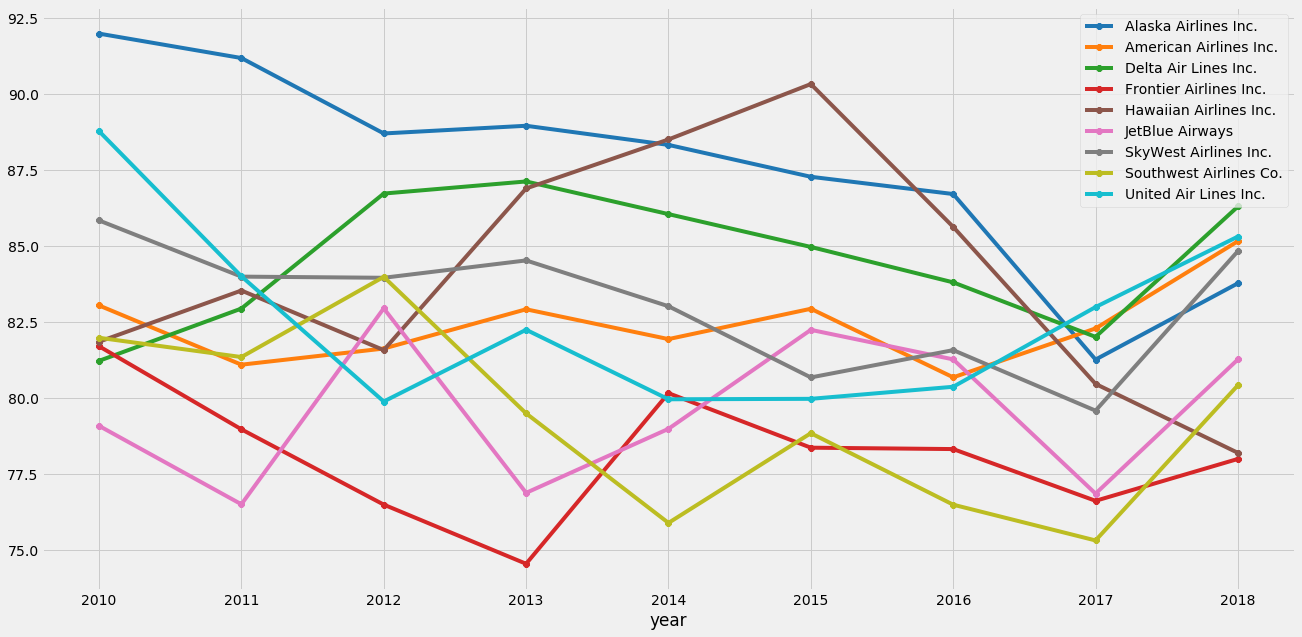

In [220]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in ontime_arr_pct]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for airline in ontime_arr_pct.index.values:
    ontime_arr_pct.loc[airline,:].plot(kind='line', marker="8", linestyle='-')
    #plt.plot(x_axis, ontime_arr_pct.loc[airline,:],kind='line', marker="8", linestyle='-')
    
plt.legend(loc='best')

In [317]:
# details of the delays:

In [374]:
data_lax

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,...,2.83,125.88,49,7,25079,9537,1082,5213,391,8856
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,...,0.00,3.13,0,0,1485,758,73,434,0,220
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,...,0.00,7.32,0,0,632,71,16,143,0,402
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,...,9.38,19.83,1,0,6021,2496,418,1255,621,1231
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,...,0.00,39.48,4,4,10147,4911,516,2168,0,2552
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,...,0.00,7.52,0,0,1204,351,48,440,0,365
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,...,0.00,17.30,0,0,2173,641,104,507,0,921
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,...,0.00,6.05,0,0,1174,963,0,21,0,190
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,...,0.81,107.48,35,3,9076,1107,203,1899,55,5812
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,...,2.53,347.08,79,2,32850,6017,808,6506,71,19448


In [118]:
data_2018 = data_lax[data_lax['year'] == 2018]

In [233]:
data_2018['nas_ct'].head()

1214     37.05
1215    188.77
1216     84.36
1217     60.93
1218    149.51
Name: nas_ct, dtype: float64

In [120]:
data_2018.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [121]:
new_data_2018 = data_2018[['month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']].reset_index(drop=True)

new_data_2018

,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,1,NK,Spirit Air Lines,LAX,"Los Angeles, CA: Los Angeles International",682,83,24.28,3.00,37.05,0.94,17.74,7,1
1,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2946,488,76.87,4.52,188.77,1.55,216.29,37,0
2,1,UA,United Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2126,252,87.05,19.48,84.36,0.00,61.11,15,0
3,1,VX,Virgin America,LAX,"Los Angeles, CA: Los Angeles International",1201,138,33.65,6.48,60.93,1.21,35.73,24,2
4,1,WN,Southwest Airlines Co.,LAX,"Los Angeles, CA: Los Angeles International",3604,596,185.48,3.51,149.51,3.08,254.43,61,6
5,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3153,371,148.71,20.30,109.10,1.10,91.79,41,1
6,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",702,56,13.28,1.68,34.53,0.00,6.51,2,0
7,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",529,87,45.01,4.01,17.45,0.14,20.39,16,1
8,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2455,327,122.53,30.27,124.96,0.00,49.24,22,6
9,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",124,25,7.22,0.79,8.60,0.00,8.39,1,0


In [165]:
# new_data_2018['carrier_ct%'] = (new_data_2018['carrier_ct'] / new_data_2018['arr_del15']) * 100
# new_data_2018['carrier_ct%'] 
def find_percentage(carrier_delays, total_flights_delayed):
    #carrier_delays, total_flights_delayed = a
    if (total_flights_delayed != 0):
        pct = (carrier_delays / total_flights_delayed) * 100
        return pct
    else:
        return (0)
    
    

In [161]:
#new_data_2018['carrier_ct%'] = new_data_2018[['carrier_ct', 'arr_del15']].apply(find_percentage, axis=1)

new_data_2018['carrier_ct%'] = new_data_2018.apply(lambda row: find_percentage(row['carrier_ct'], row['arr_del15']),axis=1)
new_data_2018['weather_ct%'] = new_data_2018.apply(lambda row: find_percentage(row['weather_ct'], row['arr_del15']),axis=1)
new_data_2018['nas_ct%'] = new_data_2018.apply(lambda row: find_percentage(row['nas_ct'], row['arr_del15']),axis=1)
new_data_2018['security_ct%'] = new_data_2018.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)
new_data_2018['late_aircraft_ct%'] = new_data_2018.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)


new_data_2018









,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
0,1,NK,Spirit Air Lines,LAX,"Los Angeles, CA: Los Angeles International",682,83,24.28,3.00,37.05,0.94,17.74,7,1,29.253012,3.614458,44.638554,1.132530,1.132530
1,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2946,488,76.87,4.52,188.77,1.55,216.29,37,0,15.752049,0.926230,38.682377,0.317623,0.317623
2,1,UA,United Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2126,252,87.05,19.48,84.36,0.00,61.11,15,0,34.543651,7.730159,33.476190,0.000000,0.000000
3,1,VX,Virgin America,LAX,"Los Angeles, CA: Los Angeles International",1201,138,33.65,6.48,60.93,1.21,35.73,24,2,24.384058,4.695652,44.152174,0.876812,0.876812
4,1,WN,Southwest Airlines Co.,LAX,"Los Angeles, CA: Los Angeles International",3604,596,185.48,3.51,149.51,3.08,254.43,61,6,31.120805,0.588926,25.085570,0.516779,0.516779
5,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3153,371,148.71,20.30,109.10,1.10,91.79,41,1,40.083558,5.471698,29.407008,0.296496,0.296496
6,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",702,56,13.28,1.68,34.53,0.00,6.51,2,0,23.714286,3.000000,61.660714,0.000000,0.000000
7,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",529,87,45.01,4.01,17.45,0.14,20.39,16,1,51.735632,4.609195,20.057471,0.160920,0.160920
8,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2455,327,122.53,30.27,124.96,0.00,49.24,22,6,37.470948,9.256881,38.214067,0.000000,0.000000
9,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",124,25,7.22,0.79,8.60,0.00,8.39,1,0,28.880000,3.160000,34.400000,0.000000,0.000000


In [143]:
test4_df = new_data_2018.groupby(by=['carrier','month']).mean()
test4_df

test4_df = test4_df.pivot_table(index='carrier', columns='month', fill_value=0)
test4_df
new_test4_df = test4_df[['carrier_ct%','weather_ct%', 'nas_ct%', 'security_ct%', 'late_aircraft_ct%']]
new_test4_df

carrier_ct%                                                         \
month            1          2          3          4          5          6    
carrier                                                                      
AA        40.083558  35.120735  30.077088  30.348387  30.816901  34.539384   
AS        23.714286  28.755556   9.914286  17.336898  23.805310  29.921127   
B6        51.735632  26.356250  32.088608  31.732143  47.819048  35.579545   
DL        37.470948  26.617577  25.550305  25.893372  28.003945  40.396396   
F9        28.880000  28.450000  31.648649  19.550000  28.120000  43.692308   
G4        10.774194  20.166667  22.977778  23.862069  35.533333  25.130435   
HA        90.564516  87.918367  60.642857  65.702128  70.019608  94.096774   
NK        29.253012  22.918033  18.131783   2.153846  22.022059  11.281818   
OO        15.752049  15.175166  10.304582  14.201717  11.669492  21.918114   
UA        34.543651  29.185430  28.165775  22.251337  20.347072  24.225532   
VX        24.384058  23.112994  19.893891   0.000000   0.000000   0.000000   
WN        31.120805  29.838084  22.683696  26.191829  29.090559  30.574101   

                                                       ...     \
month           7          8          9          10    ...      
carrier                                                ...      
AA       30.683155  32.605078  34.512720  28.108861    ...      
AS       36.020997  36.497630  28.068826  20.495868    ...      
B6       27.338843  26.676056  29.240000  22.061069    ...      
DL       38.891204  29.846457  40.365942  36.526462    ...      
F9       34.851852  50.055556  42.363636  31.064516    ...      
G4       25.017857  31.640000  60.214286  40.423077    ...      
HA       87.339623  64.500000  59.533333  87.945455    ...      
NK       17.167883  24.227586  19.364865  18.929577    ...      
OO       23.264642  20.168860  21.485816  14.449210    ...      
UA       26.970894  25.374312  32.146580  26.630872    ...      
VX        0.000000   0.000000   0.000000   0.000000    ...      
WN       31.748634  31.265602  28.682281  29.239782    ...      

        late_aircraft_ct%                                                    \
month                  3         4         5         6         7         8    
carrier                                                                       
AA               0.154176  0.240860  0.000000  0.294521  0.172460  0.259520   
AS               0.428571  0.382353  0.077434  0.397183  0.047244  0.236967   
B6               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
DL               0.000000  0.144092  0.372781  0.000000  0.694444  0.177165   
F9               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
G4               0.000000  0.000000  0.000000  0.000000  0.464286  0.000000   
HA               2.238095  0.000000  0.000000  0.532258  0.000000  0.000000   
NK               0.000000  0.000000  0.000000  0.000000  0.000000  0.724138   
OO               0.134771  0.160944  0.099576  0.086849  0.325380  0.017544   
UA               0.000000  0.000000  0.000000  0.025532  0.000000  0.000000   
VX               0.443730  0.000000  0.000000  0.000000  0.000000  0.000000   
WN               0.199850  0.005329  0.096339  0.502158  0.295082  0.126270   

                                                 
month          9         10        11        12  
carrier                                          
AA       0.481409  0.049367  0.118343  0.497354  
AS       0.000000  0.000000  0.000000  0.154362  
B6       0.746667  0.000000  0.000000  0.000000  
DL       0.297101  0.000000  0.000000  0.000000  
F9       0.000000  0.000000  0.000000  0.000000  
G4       0.000000  0.000000  0.000000  0.000000  
HA       0.000000  2.581818  0.727273  0.000000  
NK       0.310811  2.183099  1.437500  0.000000  
OO       0.301418  0.000000  0.302115  0.000000  
UA       0.000000  0.000000  0.000000  0.000000  
VX       0.000000  0.0000

In [176]:
del_data = data_lax[['year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']]


In [229]:
#finding delays over the years:

del_data['carrier_ct%'] = del_data.apply(lambda row: find_percentage(row['carrier_ct'], row['arr_del15']),axis=1)

del_data['weather_ct%'] = del_data.apply(lambda row: find_percentage(row['weather_ct'], row['arr_del15']),axis=1)

del_data['nas_ct%'] = del_data.apply(lambda row: find_percentage(row['nas_ct'], row['arr_del15']),axis=1)

del_data['security_ct%'] = del_data.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)

del_data['late_aircraft_ct%'] = del_data.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)

        
del_data


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,150.06,2.83,125.88,49,7,32.932280,4.139955,33.873589,0.638826,0.638826
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,16.27,0.00,3.13,0,0,36.000000,5.212121,49.303030,0.000000,0.000000
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,3.02,0.00,7.32,0,0,13.000000,0.833333,25.166667,0.000000,0.000000
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,45.53,9.38,19.83,1,0,38.496183,4.450382,34.755725,7.160305,7.160305
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,63.79,0.00,39.48,4,4,41.096774,3.376344,34.295699,0.000000,0.000000
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,12.00,0.00,7.52,0,0,29.931034,2.758621,41.379310,0.000000,0.000000
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,15.26,0.00,17.30,0,0,22.045455,3.954545,34.681818,0.000000,0.000000
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,1.00,0.00,6.05,0,0,58.529412,0.000000,5.882353,0.000000,0.000000
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,57.22,0.81,107.48,35,3,7.842391,2.206522,31.097826,0.440217,0.440217
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,201.13,2.53,347.08,79,2,13.123457,1.884259,31.038580,0.390432,0.390432


In [231]:
month_data = del_data.groupby(by=['month'])[['carrier_ct%','weather_ct%', 'nas_ct%', 'security_ct%', 'late_aircraft_ct%']].mean()
month_data


,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
month,,,,,
1,33.183892,3.755348,33.968923,0.331626,0.331626
2,32.294997,3.636981,39.134510,0.197539,0.197539
3,31.356636,2.258705,38.559151,0.348621,0.348621
4,30.955210,3.107541,39.268764,0.371197,0.371197
5,32.830340,2.527757,34.922185,0.261735,0.261735
6,34.711020,3.005074,32.132617,0.317493,0.317493
7,34.201813,3.256251,30.361440,0.302925,0.302925
8,33.068728,2.820991,32.624909,0.386266,0.386266
9,34.703709,2.498176,34.528169,0.446764,0.446764


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


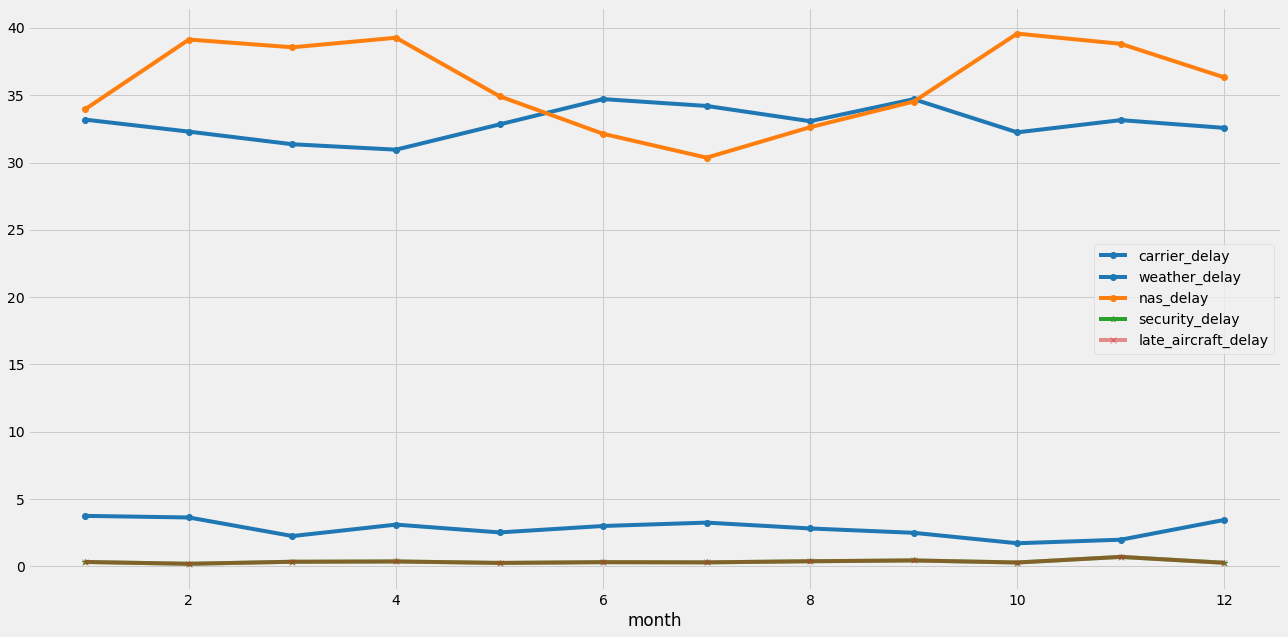

In [232]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [month for month in month_data.index.values]

num_of_plots = len(month_data.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

#new_data.plot.line(x = x_axis, y ='carrier_ct%')

# for year in new_data.index.values:
#     new_data.loc[year,:].plot(kind='line', marker="8", linestyle='-')
#     #plt.plot(x_axis, ontime_arr_pct.loc[airline,:],kind='line', marker="8", linestyle='-')
    
# plt.legend(loc='best')
ax1 = month_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = month_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = month_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = month_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = month_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)
plt.legend()


In [276]:
new_data = del_data.groupby(by=['year'])[['carrier_ct%','weather_ct%', 'nas_ct%', 'security_ct%', 'late_aircraft_ct%']].sum()

new_data


,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
year,,,,,
2010,5821.244238,336.207098,5483.200017,80.902314,80.902314
2011,5524.231897,468.972606,6247.079550,89.469693,89.469693
2012,5566.455780,479.483450,5197.296518,52.737730,52.737730
2013,5579.867485,471.626462,4954.354246,42.492638,42.492638
2014,5272.508624,519.178306,5035.262750,47.874928,47.874928
2015,4503.039623,590.373945,5421.803600,44.814400,44.814400
2016,4047.484743,325.657199,5380.621692,48.046462,48.046462
2017,3759.409507,301.344424,5786.623870,38.259060,38.259060
2018,4353.642099,341.155094,4852.387380,30.272979,30.272979


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


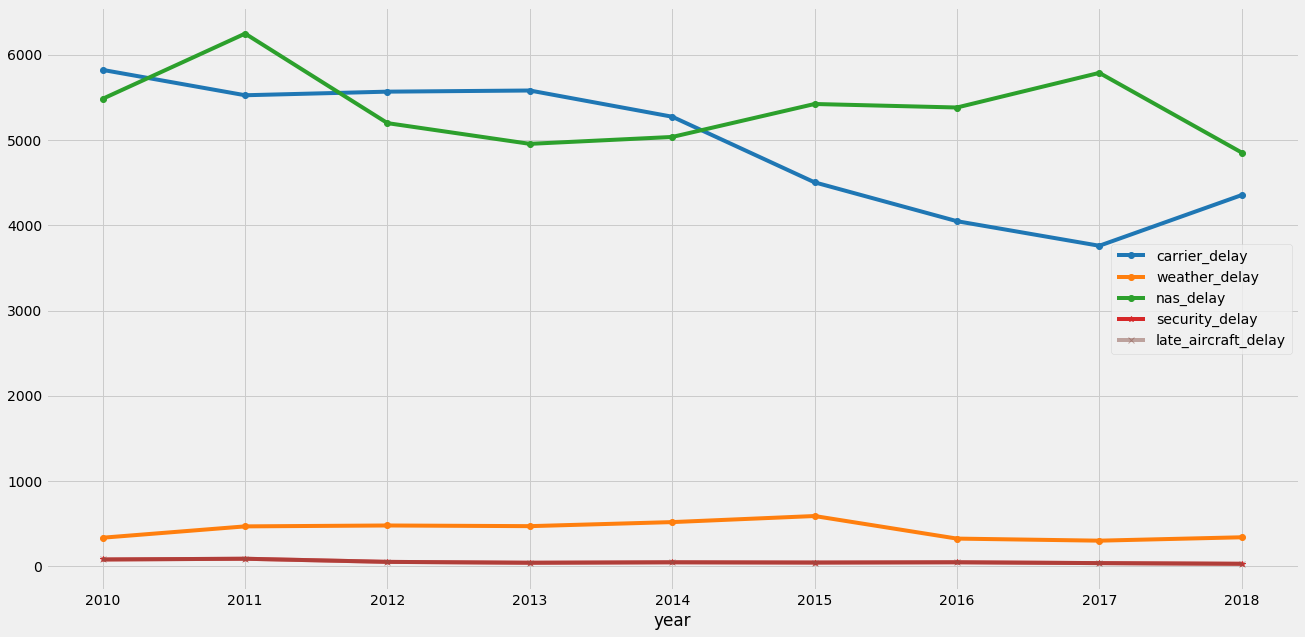

In [277]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in new_data.index.values]

num_of_plots = len(new_data.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

#new_data.plot.line(x = x_axis, y ='carrier_ct%')

# for year in new_data.index.values:
#     new_data.loc[year,:].plot(kind='line', marker="8", linestyle='-')
#     #plt.plot(x_axis, ontime_arr_pct.loc[airline,:],kind='line', marker="8", linestyle='-')
    
# plt.legend(loc='best')
ax1 = new_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = new_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = new_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = new_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = new_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)
plt.legend()


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


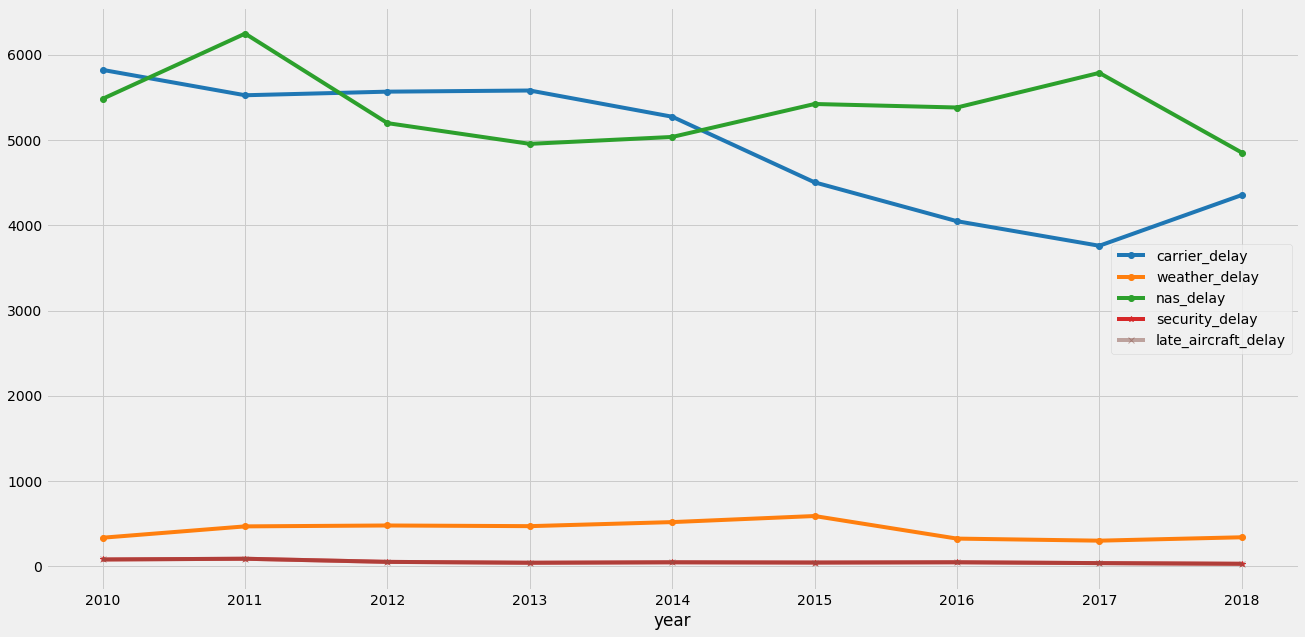

In [278]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in new_data.index.values]

num_of_plots = len(new_data.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

#new_data.plot.line(x = x_axis, y ='carrier_ct%')

# for year in new_data.index.values:
#     new_data.loc[year,:].plot(kind='line', marker="8", linestyle='-')
#     #plt.plot(x_axis, ontime_arr_pct.loc[airline,:],kind='line', marker="8", linestyle='-')
    
# plt.legend(loc='best')
ax1 = new_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = new_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = new_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = new_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = new_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)
plt.legend()


In [227]:
wn_data = del_data[del_data['carrier'] == 'WN'].groupby('year').mean()
wn_data

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
year,,,,,,,,,,,,,,,
2010,6.5,3261.250000,658.666667,196.551667,6.545833,99.896667,2.990000,352.684167,55.333333,2.583333,29.869231,1.056317,14.862894,0.418108,0.418108
2011,6.5,3240.583333,683.916667,181.208333,6.890833,141.266667,2.910833,351.640833,54.833333,4.083333,26.308276,1.148349,21.334039,0.413538,0.413538
2012,6.5,3141.500000,555.083333,161.157500,6.347500,112.495833,2.227500,272.857500,41.833333,2.000000,29.103731,1.145274,20.364866,0.381549,0.381549
2013,6.5,3117.750000,750.750000,203.768333,6.894167,161.538333,2.305000,376.245000,49.333333,3.916667,27.481076,0.921900,21.601976,0.327073,0.327073
2014,6.5,3223.000000,965.166667,257.437500,7.435000,220.725000,1.645000,477.924167,56.000000,2.333333,26.617487,0.780104,23.066673,0.166600,0.166600
2015,6.5,3417.333333,844.333333,215.775000,12.725833,274.129167,0.874167,340.830833,69.250000,3.166667,25.807024,1.423242,31.949671,0.095287,0.095287
2016,6.5,3509.750000,1010.083333,204.756667,14.939167,438.483333,1.710000,350.191667,64.500000,3.750000,20.707400,1.417290,42.733519,0.173744,0.173744
2017,6.5,3538.083333,1087.833333,212.537500,21.048333,481.695833,1.256667,371.293333,67.916667,3.500000,21.534362,1.729794,40.411407,0.158245,0.158245
2018,6.5,3571.166667,797.416667,231.311667,8.775000,227.838333,1.894167,327.600000,68.500000,3.333333,29.689938,1.177679,26.762751,0.264980,0.264980


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


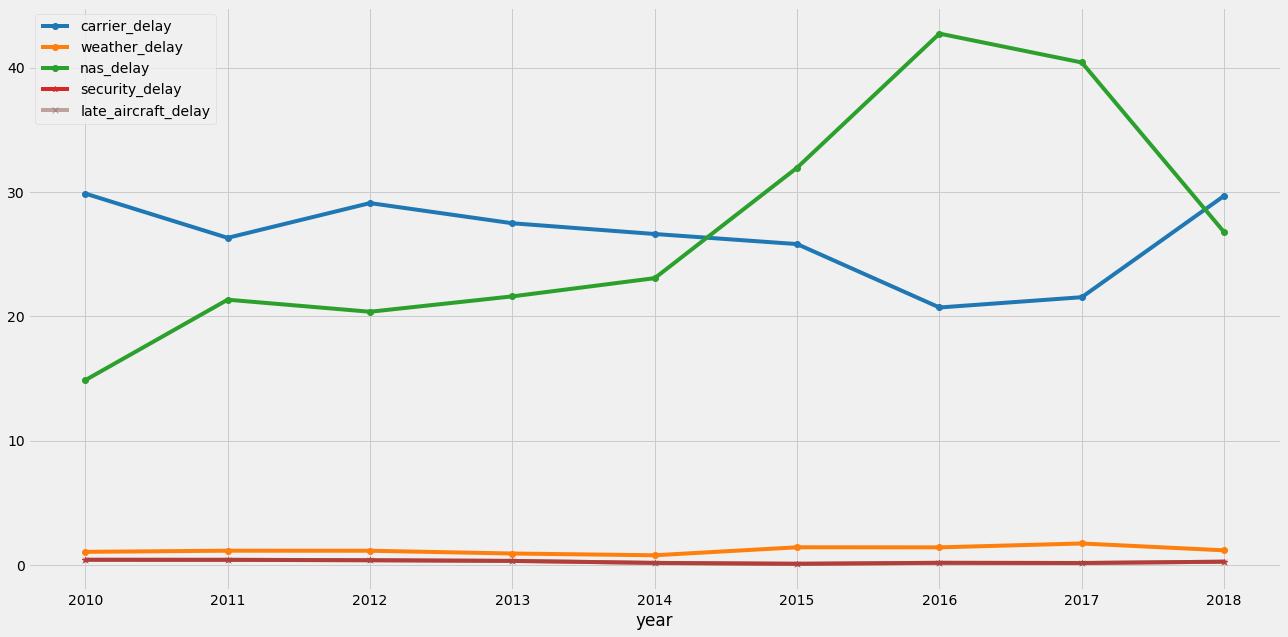

In [228]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in wn_data.index.values]

num_of_plots = len(wn_data.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

#new_data.plot.line(x = x_axis, y ='carrier_ct%')

# for year in new_data.index.values:
#     new_data.loc[year,:].plot(kind='line', marker="8", linestyle='-')
#     #plt.plot(x_axis, ontime_arr_pct.loc[airline,:],kind='line', marker="8", linestyle='-')
    
# plt.legend(loc='best')
ax1 = wn_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = wn_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = wn_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = wn_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = wn_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)
plt.legend()
